In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('filtrado/Brasil.csv')
df = df.append(pd.read_csv('filtrado/Centro-Oeste.csv'),ignore_index=True)
df = df.append(pd.read_csv('filtrado/Nordeste.csv'),ignore_index=True)
df = df.append(pd.read_csv('filtrado/Norte.csv'),ignore_index=True)
df = df.append(pd.read_csv('filtrado/Sudeste.csv'),ignore_index=True)
df = df.append(pd.read_csv('filtrado/Sul.csv'),ignore_index=True)

In [47]:
df.index = pd.to_datetime(df['data'])

In [48]:
df

,Unnamed: 0,Unnamed: 0.1,regiao,estado,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
data,,,,,,,,,,,,
2020-02-25,0,0,Brasil,NaN,76,2020-02-25,9,210147125.0,0.0,0,0,0
2020-02-26,1,1,Brasil,NaN,76,2020-02-26,9,210147125.0,1.0,1,0,0
2020-02-27,2,2,Brasil,NaN,76,2020-02-27,9,210147125.0,1.0,0,0,0
2020-02-28,3,3,Brasil,NaN,76,2020-02-28,9,210147125.0,1.0,0,0,0
2020-02-29,4,4,Brasil,NaN,76,2020-02-29,9,210147125.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-06,29703,618844,Sul,RS,43,2021-11-06,44,NaN,0.0,0,0,0
2021-11-07,29704,618845,Sul,RS,43,2021-11-07,45,NaN,0.0,0,0,0
2021-11-08,29705,618846,Sul,RS,43,2021-11-08,45,NaN,0.0,0,0,0


In [88]:
aux =df.groupby(by=[df.index.year,df.index.month,df['regiao']]).sum()

In [89]:

auxcase = aux['casosNovos']
auxcase = auxcase.reset_index(level=2)
auxdeath = aux['obitosNovos']
auxdeath = auxdeath.reset_index(level=2)

In [90]:
auxdeath = auxdeath.pivot(columns='regiao')

obitosNovos                                           
regiao         Brasil Centro-Oeste Nordeste Norte Sudeste    Sul
data data                                                       
2020 2              0            0        0     0       0      0
     3            201            5       23     4     162      9
     4           5700           76     1518   708    3232    171
     5          23413          297     7344  4979   10448    369
     6          30280         1363    10436  3836   13640   1068
     7          32881         3579     9380  2323   14349   3303
     8          28906         3908     6527  1626   12810   4104
     9          22571         3408     4026  1570   10457   3085
     10         15932         2190     2985   932    7796   2070
     11         13236         1309     2294   818    6235   2605
     12         21829         1713     3287  1235   10257   5377
2021 1          29555         2153     3801  4138   14582   4955
     2          30438         2386     5002  4908   13849   4391
     3          66573         7059    12511  5457   25724  15948
     4          82266         8683    14094  5377   40693  13570
     5          59010         5137    12257  3220   29485   9013
     6          55275         5193    11095  2339   27681   9104
     7          38304         3412     6023  1561   19773   7592
     8          24043         3219     3064   997   12947   3886
     9          16336         1985     1501   508    9539   2829
     10         11075         1327     1199   310    5823   2437
     11          2212          219      298    74    1132    499

In [91]:
auxcase = auxcase.pivot(columns='regiao')

<AxesSubplot:xlabel='data,data'>

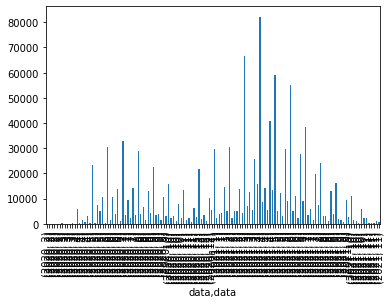

In [101]:
auxdeath.plot.bar(legend=False)

In [102]:
auxdeath.to_csv('analiseobito.csv')

In [103]:
auxcase.to_csv('analisecasos.csv')